In [14]:
import os
import git
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True

In [15]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from reporting import *
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "final_plots", "results")
main_df = main_df.copy()
np.random.seed(0)

# KS Stats Across Priors

In [16]:
statistical_cutoffs = -np.arange(1, 13, 2) # -np.hstack([np.arange(1, 13, 2), np.arange(14, 30, 2), np.arange(30, 100, 5)]) # -np.array([x**2 for x in range(1, 8)]) #np.arange(1, 40, 5)

for i in statistical_cutoffs:
    alpha = 10.0**i
    main_df[f'kstest_stat_cutoff_{i}'] = np.nan_to_num(stats.kstwo(n=main_df['total_samples']).isf(alpha))

alphas = np.linspace(0.1, 0.4, len(statistical_cutoffs))
alphas, [10.0**i for i in list(statistical_cutoffs)]

(array([0.1 , 0.16, 0.22, 0.28, 0.34, 0.4 ]),
 [0.1, 0.001, 1e-05, 1e-07, 1e-09, 1e-11])

In [ ]:
alphas = 

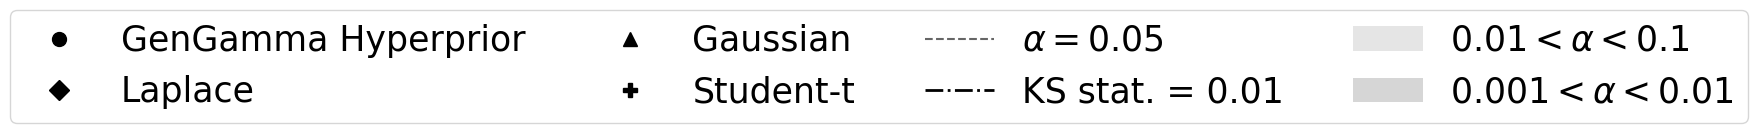

In [17]:
practical_pass = 0.01
marker_size = 10 
fontsize = 25
markersize = 10
labelsize = 15
markertypes = ['o', 'D', '^', 'P']
labels = ['GenGamma Hyperprior', 'Laplace', 'Gaussian', 'Student-t', r'$\alpha=0.05$', 'KS stat. = 0.01', r'$0.01<\alpha<0.1$', r'$0.001<\alpha<0.01$']
points = [Line2D([0], [0], color='k', linestyle='', marker=m, markersize=10) for m in markertypes] + [
    Line2D([0], [0], color='black', linestyle='--', markersize=10, alpha=0.6),
    Line2D([0], [0], linestyle="-.", color='black', linewidth=2),
    Rectangle((0, 0), 1, 1, alpha=alphas[0], facecolor='black'),
    Rectangle((0, 0), 1, 1, alpha=alphas[1], facecolor='black'),
]

fig, ax = plt.subplots(figsize=(5, 1))
# fig.patch.set_facecolor('#F9FCD6')
ax.axis('off')  # Turn off the axes, including borders and tick marks

plt.legend(points, labels, ncols=len(labels)//2, loc='center', fontsize=fontsize, frameon=True)  # Add legend without frame

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "ksstat_legend.jpg")
    plt.savefig(save_path, dpi=DPI, bbox_inches='tight')  # Remove whitespace

plt.show()


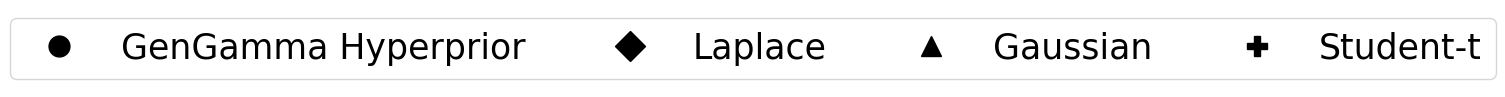

In [18]:
practical_pass = 0.01
marker_size = 10 
fontsize = 25
markersize = 10
labelsize = 15
markertypes = ['o', 'D', '^', 'P']
labels = ['GenGamma Hyperprior', 'Laplace', 'Gaussian', 'Student-t']
points = [Line2D([0], [0], color='k', linestyle='', marker=m, markersize=10) for m in markertypes]

fig, ax = plt.subplots(figsize=(5, 1))
# fig.patch.set_facecolor('#F9FCD6')
ax.axis('off')  # Turn off the axes, including borders and tick marks

plt.legend(points, labels, ncols=len(labels), loc='center', fontsize=fontsize, frameon=True, markerscale=1.5)  # Add legend without frame

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "ksstat_legend_priors.jpg")
    plt.savefig(save_path, dpi=DPI, bbox_inches='tight')  # Remove whitespace

plt.show()


In [19]:
name_mapping = {
                'syntheticMRI3Dfull': 'syntheticMRI3D',
                'syntheticMRI2Daxial': 'syntheticMRI2D (axial)',
                'syntheticMRI2Dsagittal': 'syntheticMRI2D (sagittal)',
                'syntheticMRI2Dcoronal': 'syntheticMRI2D (coronal)',
                'spaceNetfull': 'spaceNet',
                'cocoindoor': 'coco (indoor)',
                'cocooutdoor': 'coco (outdoor)',
                'pastisfull': 'pastis',
                'segmentAnythingfull': 'segmentAnything',
                'agriVisionfull': 'agriVision',
                'standardTestingfull': 'standardTesting'}

main_df['dataset'] = (main_df['dataset'] + main_df['subset']).replace(name_mapping)

## Remote Sensing

KeyboardInterrupt: 

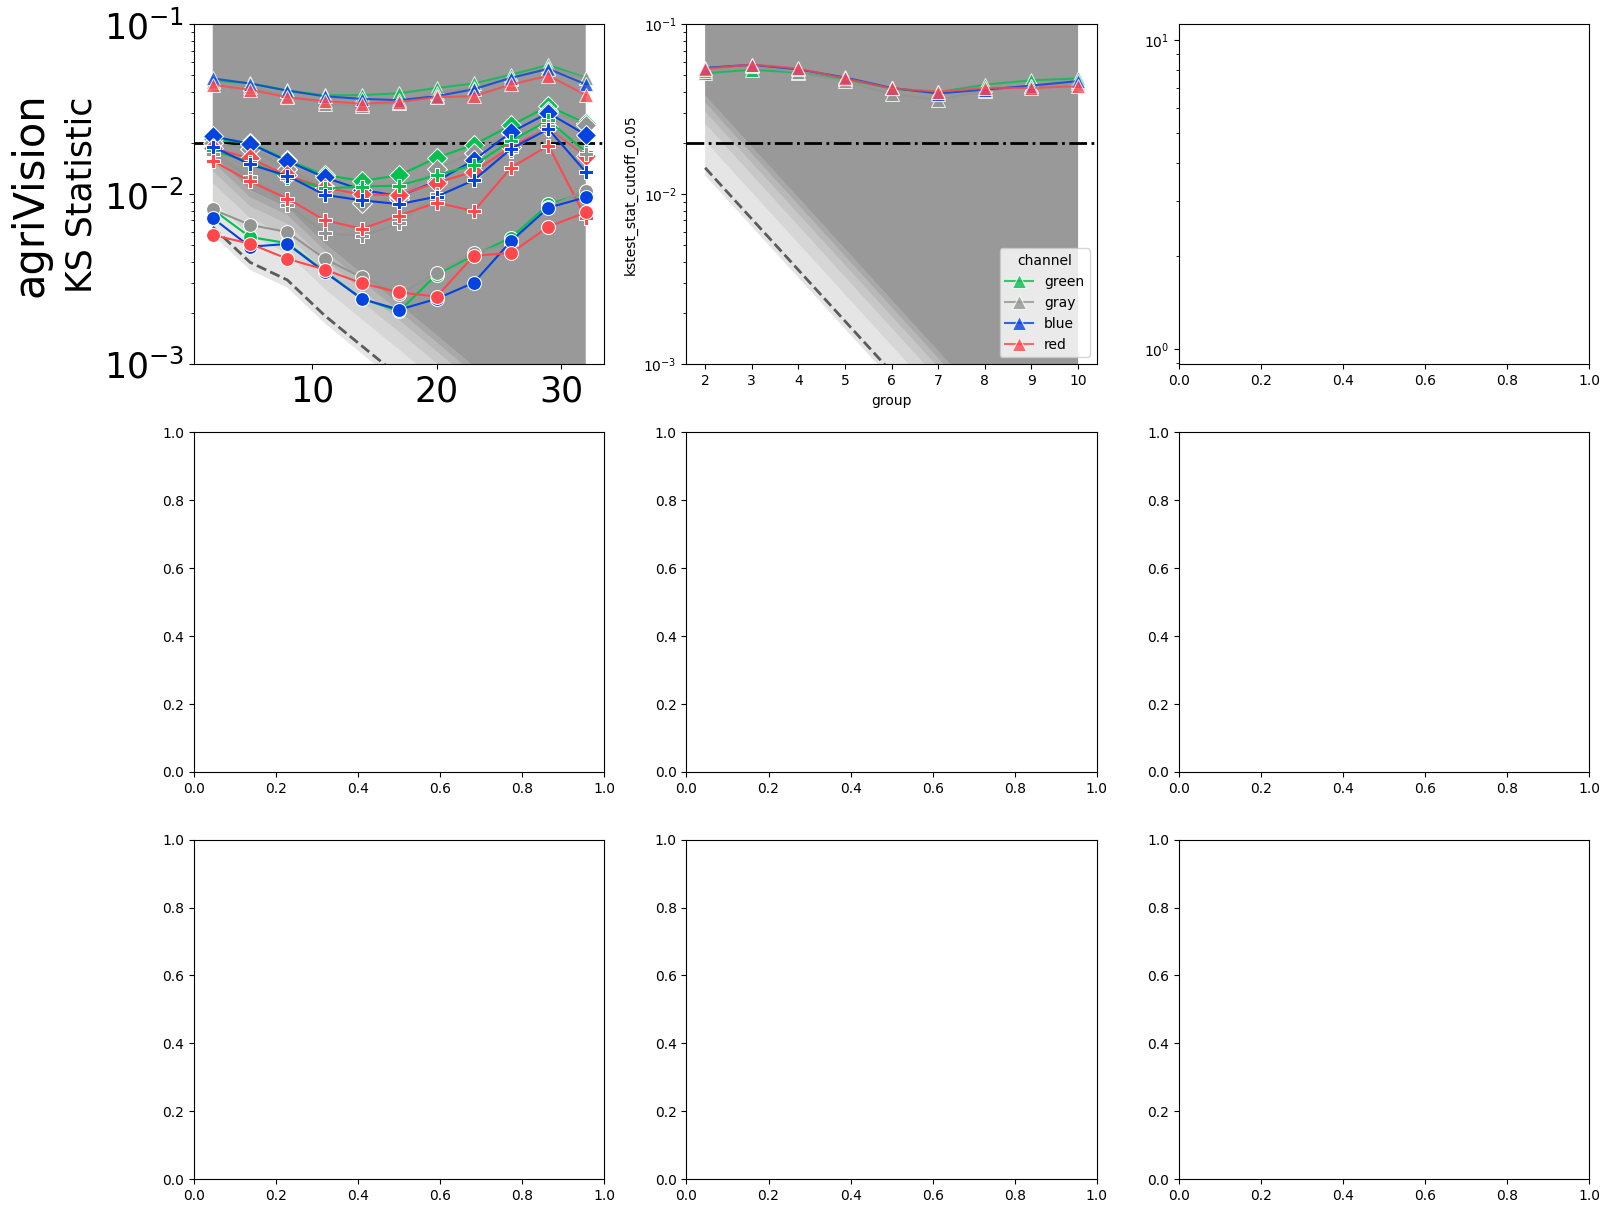

In [20]:
hue = 'channel'
fixed_palette = {'gray': 'xkcd:gray', 'green': 'xkcd:shamrock green', 'red': 'xkcd:light red', 'blue': 'xkcd:blue'}
toggle_markeredgecolor = True  # Set to True to enable markeredgecolor, False to disable
log_scale = not False
datasets_to_include = ['agriVision', 'pastis', 'spaceNet']  # List of datasets to include
num_datasets = len(datasets_to_include)
practical_pass = 0.02
marker_size = 10 
fontsize = 25

fig, axes = plt.subplots(num_datasets, 3, figsize=(18, 5 * num_datasets), sharey=False)

# fig.suptitle("Remote Sensing Datasets: KS Test Statistics for Different Priors", y=1, fontsize=fontsize+4)

for i, dataset_name in enumerate(datasets_to_include):

    axes[i, 0].annotate(dataset_name, xy=(0, 0.5), xytext=(-axes[i, 0].yaxis.labelpad - 5, 0),
                        xycoords=axes[i, 0].yaxis.label, textcoords='offset points',
                        ha='right', va='center', fontsize=fontsize+5, rotation=90)
    
    hue = 'channel'
    fixed_palette = {'gray': 'xkcd:gray', 'green': 'xkcd:shamrock green', 'red': 'xkcd:light red', 'blue': 'xkcd:blue'}

    if log_scale:
        axes[i, 0].set_yscale('log')
        axes[i, 1].set_yscale('log')
        axes[i, 2].set_yscale('log')

    # LEFT PLOT
    transform = 'fourier'
    GROUP_NAME = 'Band'
    dataset_filter = (main_df['dataset'] == dataset_name)
    transform_filter = (main_df['transform'] == transform)
    temp = main_df[dataset_filter & transform_filter]
    temp = temp.sort_values('kstest_stat_cutoff_0.05')
    
    # Region
    y_limits = (10 ** np.floor(np.log10(np.min(np.array(temp.filter(regex='kstest_stat_\w+$'))))), 10 ** np.ceil(np.log10(np.max(np.array(temp.filter(regex='kstest_stat_\w+$')))))) 
    axes[i, 0].set_ylim(y_limits) 

    cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
    for k, alpha in enumerate(statistical_cutoffs[:-1]):
        axes[i, 0].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
    axes[i, 0].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)
    
    # alpha=0.05
    cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
    sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=axes[i, 0])
    
    # ks = 0.02
    axes[i, 0].axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)

    # results
    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    
    axes[i, 0].set_xlabel("", fontsize=fontsize)
    axes[i, 0].set_ylabel(f"KS Statistic", fontsize=fontsize)
    axes[i, 0].legend(points, labels, fontsize=12).set_visible(False)
    axes[i, 0].tick_params(axis='both', which='major', labelsize=fontsize)
    
    # MIDDLE PLOT
    transform = 'wavelet'
    GROUP_NAME = 'Layer'
    transform_filter = (main_df['transform'] == transform) & (main_df['orientation'] == 'horizVert')
    temp = main_df[dataset_filter & transform_filter]
    temp = temp.sort_values('kstest_stat_cutoff_0.05')

    y_limits = (10 ** np.floor(np.log10(np.min(np.array(temp.filter(regex='kstest_stat_\w+$'))))), 10 ** np.ceil(np.log10(np.max(np.array(temp.filter(regex='kstest_stat_\w+$')))))) 
    axes[i, 1].set_ylim(y_limits)  

    cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
    for k, alpha in enumerate(statistical_cutoffs[:-1]):
        axes[i, 1].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
    axes[i, 1].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)

    cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
    sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=axes[i, 1])

    axes[i, 1].axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)
    
    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    
    axes[i, 1].set_xlabel("", fontsize=fontsize)
    axes[i, 1].set_ylabel("", fontsize=fontsize)
    axes[i, 1].legend(points, labels, fontsize=12).set_visible(False)
    axes[i, 1].tick_params(axis='both', which='major', labelsize=fontsize)
   
    # RIGHT PLOT
    transform = 'wavelet'
    GROUP_NAME = 'Layer'
    transform_filter = (main_df['transform'] == transform) & (main_df['orientation'] == 'diagonal')
    temp = main_df[dataset_filter & transform_filter]
    temp = temp.sort_values('kstest_stat_cutoff_0.05')

    y_limits = (10 ** np.floor(np.log10(np.min(np.array(temp.filter(regex='kstest_stat_\w+$'))))), 10 ** np.ceil(np.log10(np.max(np.array(temp.filter(regex='kstest_stat_\w+$')))))) 
    axes[i, 2].set_ylim(y_limits)

    cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
    for k, alpha in enumerate(statistical_cutoffs[:-1]):
        axes[i, 2].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
    axes[i, 2].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)


    cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
    sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=axes[i, 2])

    axes[i, 2].axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)

    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    
    axes[i, 2].set_xlabel("", fontsize=fontsize)
    axes[i, 2].set_ylabel("", fontsize=fontsize)
    axes[i, 2].legend(points, labels, fontsize=12).set_visible(False)
    axes[i, 2].tick_params(axis='both', which='major', labelsize=fontsize)

axes[0, 0].set_title(f"Fourier", fontsize=fontsize+5, y=1.05)
axes[0, 1].set_title(f"Wavelet Horiz. & Vert.", fontsize=fontsize+5, y=1.05)
axes[0, 2].set_title(f"Wavelet Diagonal", fontsize=fontsize+5, y=1.05)

axes[2, 0].set_xlabel("Band", fontsize=fontsize)
axes[2, 1].set_xlabel("Layer", fontsize=fontsize)
axes[2, 2].set_xlabel("Layer", fontsize=fontsize)



plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "ksstats_remote_sensing.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')


# Natural Images

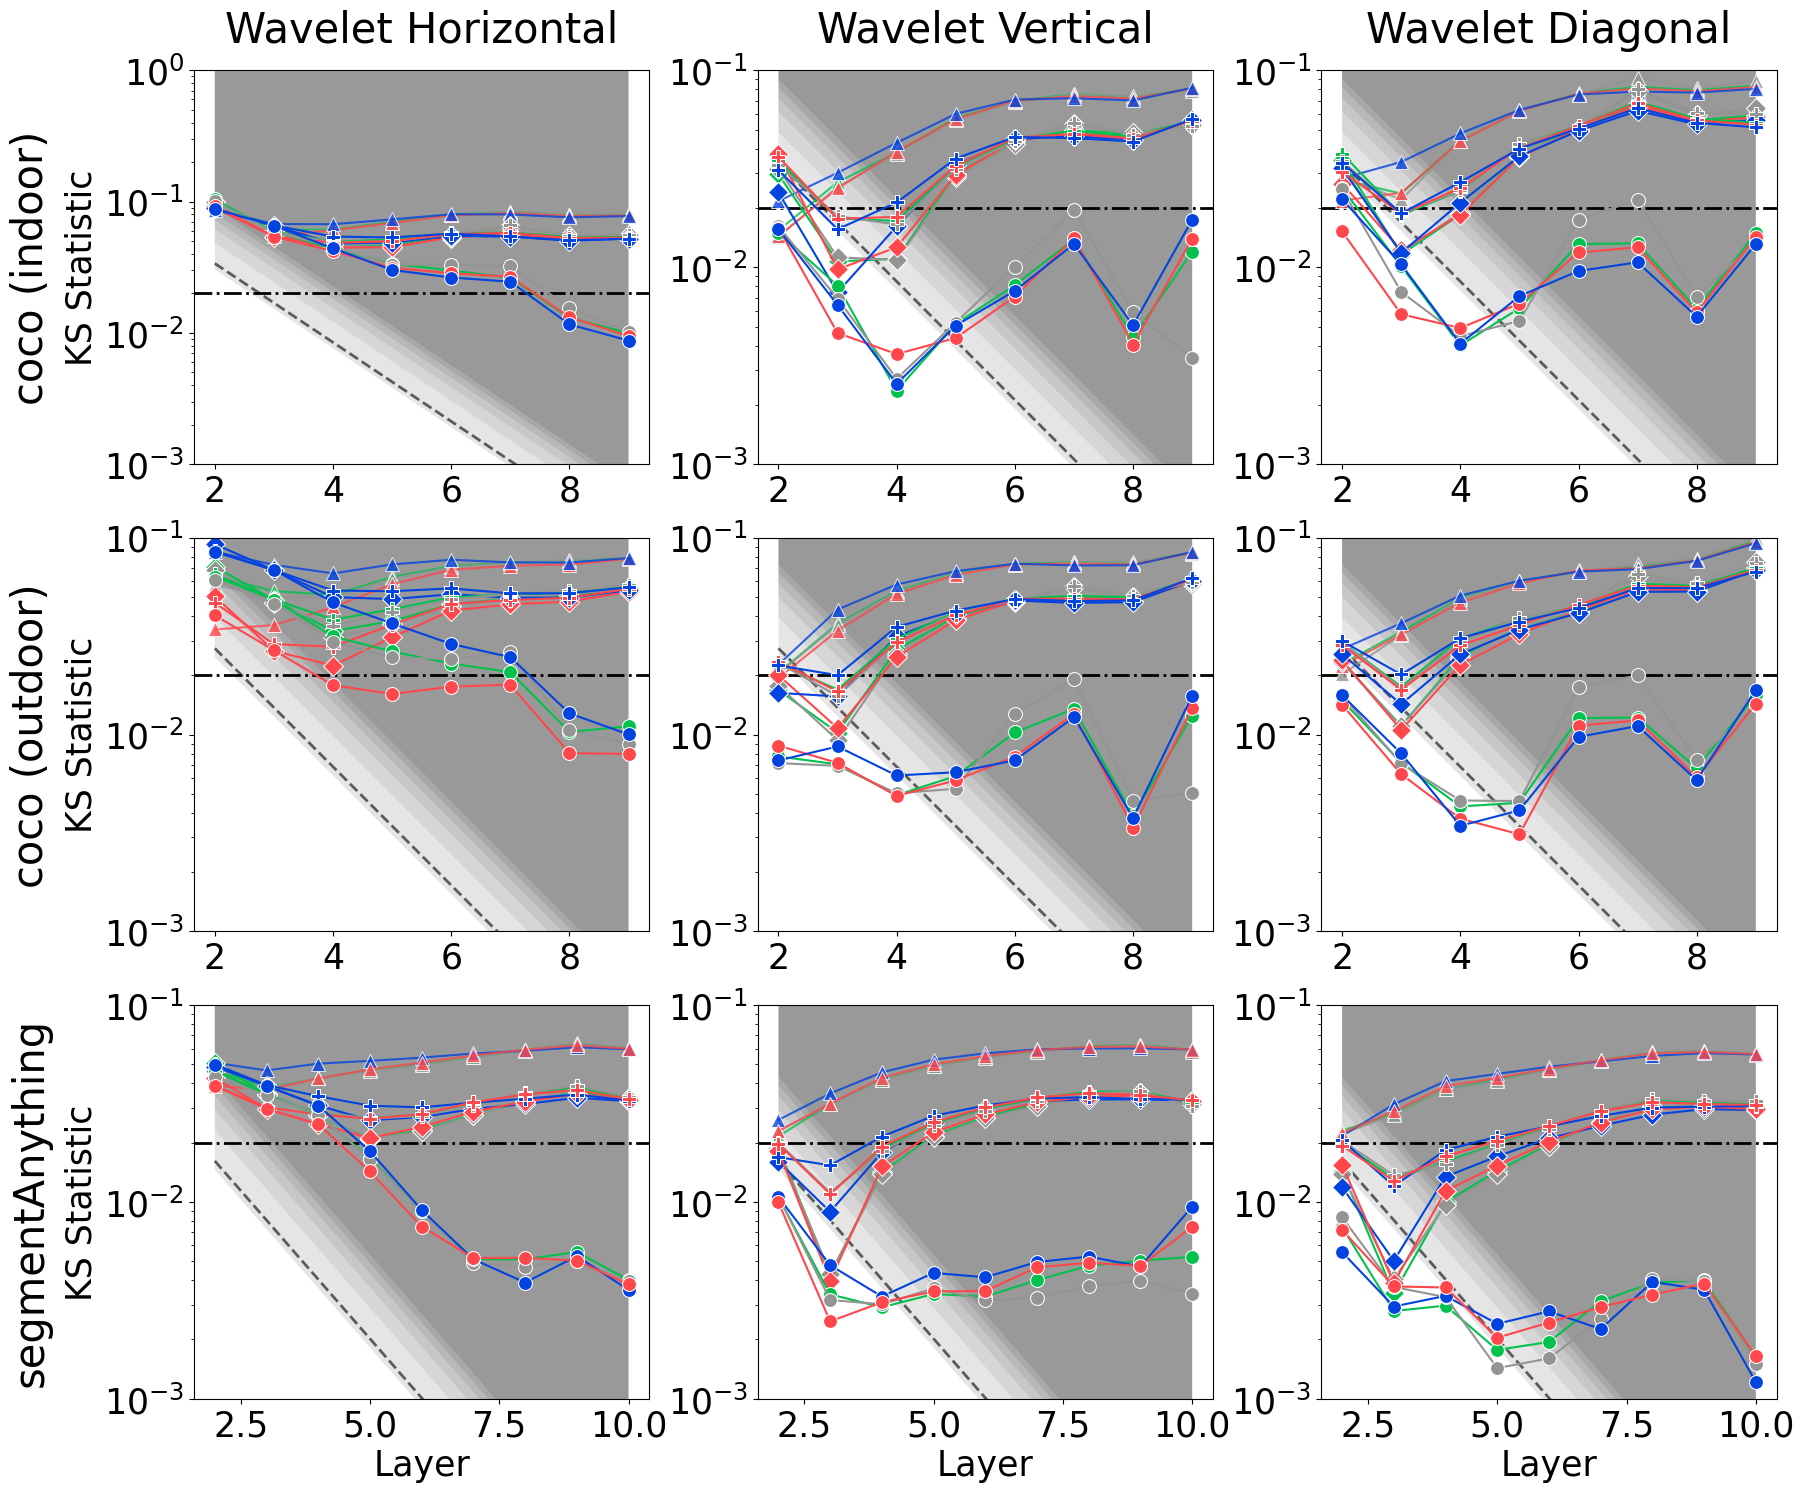

In [ ]:
hue = 'channel'
fixed_palette = {'gray': 'xkcd:gray', 'green': 'xkcd:shamrock green', 'red': 'xkcd:light red', 'blue': 'xkcd:blue'}
toggle_markeredgecolor = True  # Set to True to enable markeredgecolor, False to disable
log_scale = not False
datasets_to_include = ['coco (indoor)', 'coco (outdoor)', 'segmentAnything']  # List of datasets to include
num_datasets = len(datasets_to_include)
marker_size = 10 

fig, axes = plt.subplots(num_datasets, 3, figsize=(18, 5 * num_datasets))

# fig.suptitle("Natural Image Datasets: KS Test Statistics for Different Priors", y=1, fontsize=fontsize + 4)

for i, dataset_name in enumerate(datasets_to_include):

    axes[i, 0].annotate(dataset_name, xy=(0, 0.5), xytext=(-axes[i, 0].yaxis.labelpad - 5, 0),
                        xycoords=axes[i, 0].yaxis.label, textcoords='offset points',
                        ha='right', va='center', fontsize=fontsize+5, rotation=90)
    
    hue = 'channel'
    fixed_palette = {'gray': 'xkcd:gray', 'green': 'xkcd:shamrock green', 'red': 'xkcd:light red', 'blue': 'xkcd:blue'}

    transform = 'wavelet'
    GROUP_NAME = 'Layer'
    dataset_filter = (main_df['dataset'] == dataset_name)
    transform_filter = (main_df['transform'] == transform) & (main_df['orientation'] == 'horizontal')
    temp = main_df[dataset_filter & transform_filter]
    temp = temp.sort_values('kstest_stat_cutoff_0.05')

    if log_scale:
        axes[i, 0].set_yscale('log')
        axes[i, 1].set_yscale('log')
        axes[i, 2].set_yscale('log')

    y_limits = (10 ** np.floor(np.log10(np.min(np.array(temp.filter(regex='kstest_stat_\w+$'))))), 10 ** np.ceil(np.log10(np.max(np.array(temp.filter(regex='kstest_stat_\w+$')))))) 
    axes[i, 0].set_ylim(y_limits) 

    cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
    for k, alpha in enumerate(statistical_cutoffs[:-1]):
        axes[i, 0].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
    axes[i, 0].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)
    
    # alpha=0.05
    cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
    sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=axes[i, 0])
    
    # ks = 0.02
    axes[i, 0].axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)

    # results
    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[i, 0], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    
    axes[i, 0].set_xlabel("", fontsize=fontsize)
    axes[i, 0].set_ylabel("KS Statistic", fontsize=fontsize)
    axes[i, 0].legend(points, labels, fontsize=12).set_visible(False) 
    axes[i, 0].tick_params(axis='both', which='major', labelsize=fontsize)

    transform_filter = (main_df['transform'] == transform) & (main_df['orientation'] == 'vertical')
    temp = main_df[dataset_filter & transform_filter]
    temp = temp.sort_values('kstest_stat_cutoff_0.05')

    y_limits = (10 ** np.floor(np.log10(np.min(np.array(temp.filter(regex='kstest_stat_\w+$'))))), 10 ** np.ceil(np.log10(np.max(np.array(temp.filter(regex='kstest_stat_\w+$')))))) 
    axes[i, 1].set_ylim(y_limits)  

    cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
    for k, alpha in enumerate(statistical_cutoffs[:-1]):
        axes[i, 1].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
    axes[i, 1].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)

    cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
    sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=axes[i, 1])

    axes[i, 1].axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)
    
    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[i, 1], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    
    axes[i, 1].set_xlabel("", fontsize=fontsize)
    axes[i, 1].set_ylabel("", fontsize=fontsize)
    axes[i, 1].legend(points, labels, fontsize=12).set_visible(False)
    axes[i, 1].tick_params(axis='both', which='major', labelsize=fontsize)

    transform_filter = (main_df['transform'] == transform) & (main_df['orientation'] == 'diagonal')
    temp = main_df[dataset_filter & transform_filter]
    temp = temp.sort_values('kstest_stat_cutoff_0.05')

    y_limits = (10 ** np.floor(np.log10(np.min(np.array(temp.filter(regex='kstest_stat_\w+$'))))), 10 ** np.ceil(np.log10(np.max(np.array(temp.filter(regex='kstest_stat_\w+$')))))) 
    axes[i, 2].set_ylim(y_limits)

    cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
    for k, alpha in enumerate(statistical_cutoffs[:-1]):
        axes[i, 2].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
    axes[i, 2].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)

    cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
    sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=axes[i, 2])

    axes[i, 2].axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)

    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[i, 2], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    
    axes[i, 2].set_xlabel("", fontsize=fontsize)
    axes[i, 2].set_ylabel("", fontsize=fontsize)
    axes[i, 2].legend(points, labels, fontsize=12).set_visible(False)
    axes[i, 2].tick_params(axis='both', which='major', labelsize=fontsize)

axes[0, 0].set_title(f"Wavelet Horizontal", fontsize=fontsize + 5, y=1.05)
axes[0, 1].set_title(f"Wavelet Vertical", fontsize=fontsize + 5, y=1.05)
axes[0, 2].set_title(f"Wavelet Diagonal", fontsize=fontsize + 5, y=1.05)

axes[2, 0].set_xlabel("Layer", fontsize=fontsize)
axes[2, 1].set_xlabel("Layer", fontsize=fontsize)
axes[2, 2].set_xlabel("Layer", fontsize=fontsize)

plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "ksstats_natural_images.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')


# Medical Images

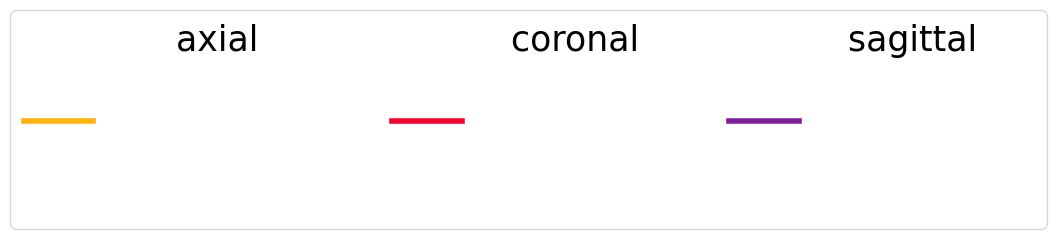

In [ ]:
fixed_palette = {'     axial         \n\n\n\n': 'xkcd:amber', '  coronal     \n\n\n\n': 'xkcd:cherry red', '  sagittal     \n\n\n\n': 'xkcd:purple'}
# Create a horizontal legend with increased spacing between entries
legend_fig = plt.figure(figsize=(10, 1))
legend_ax = legend_fig.add_subplot(111)
legend_ax.axis('off')  # Turn off the axis

# Create the legend
handles, labels = zip(*fixed_palette.items())
legend_fig.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in fixed_palette.values()],
                  labels=fixed_palette.keys(), markerscale=5,
                  loc='center', ncol=len(fixed_palette), fontsize=fontsize, handlelength=2, columnspacing=1)

plt.tight_layout()
plt.show()

if SAVE_FIGS:
    legend_save_path = os.path.join(plots_path, "ksstats_syntheticMRI2D_legend.jpg")
    legend_fig.savefig(legend_save_path, dpi=DPI, bbox_inches='tight')

fixed_palette = {'axial': 'xkcd:amber', 'coronal': 'xkcd:cherry red', 'sagittal': 'xkcd:purple'}

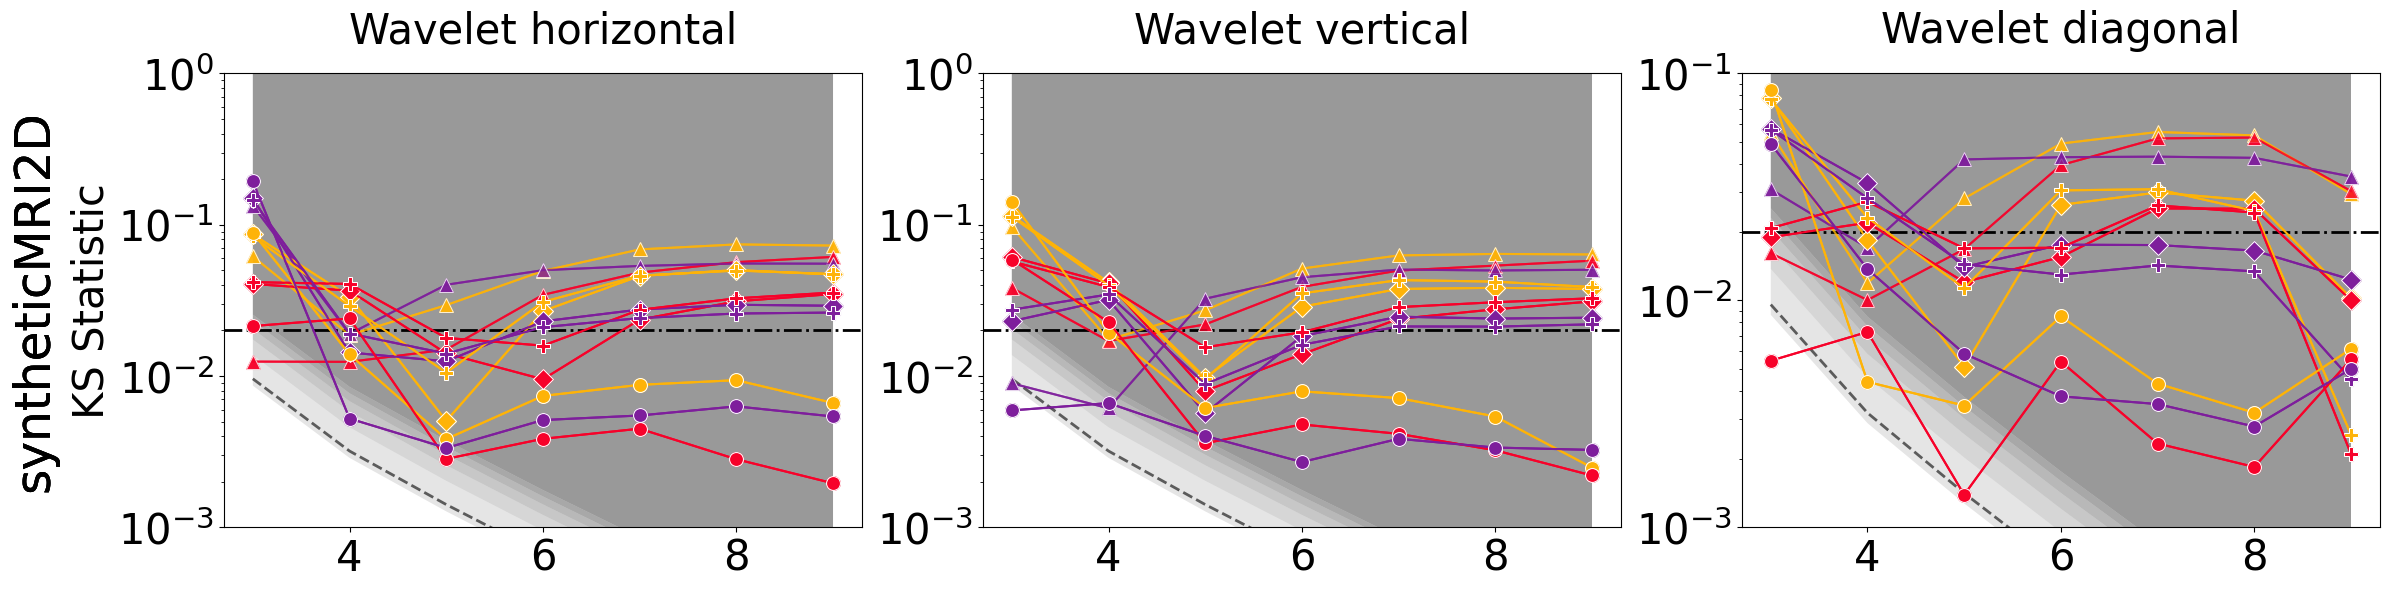

In [ ]:
hue = 'subset'
log_scale = True
dataset_name = 'syntheticMRI2D'
orientations = ['horizontal', 'vertical', 'diagonal']  # List of subsets to include
num_subsets = len(orientations)
fig, axes = plt.subplots(1, num_subsets, figsize=(8 * num_subsets, 6))
marker_size = 10 
fontsize=30

# fig.suptitle("Medical Image Datasets: KS Test Statistics for Different Priors", fontsize=fontsize+4)

if num_subsets == 1:
    axes = [axes]

for j, orientation in enumerate(orientations):

    if log_scale:
        axes[j].set_yscale('log')

    transform = 'wavelet'
    GROUP_NAME = 'Layer'
    dataset_filter = main_df['dataset'].str.startswith(dataset_name)
    transform_filter = (main_df['transform'] == transform) & (main_df['group'] > 2) & (main_df['orientation'] == orientation)
    temp = main_df[dataset_filter & transform_filter]
    temp = temp.sort_values('kstest_stat_cutoff_0.05')

    y_limits = (10 ** np.floor(np.log10(temp.filter(regex='kstest_stat_\w+$').min().min())), 
                10 ** np.ceil(np.log10(temp.filter(regex='kstest_stat_\w+$').max().max())))
    axes[j].set_ylim(y_limits)

    cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
    for k, alpha in enumerate(statistical_cutoffs[:-1]):
        axes[j].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
    axes[j].fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)


    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[j], markersize=marker_size, markeredgecolor=None)
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[j], markersize=marker_size, markeredgecolor=None)
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[j], markersize=marker_size, markeredgecolor=None)
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[j], markersize=marker_size, markeredgecolor=None)

    cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
    sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=axes[j])

    axes[j].axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)

    sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker='^', alpha=0.8, ax=axes[j], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker='D', ax=axes[j], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker='P', ax=axes[j], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker='o', ax=axes[j], markersize=marker_size, markeredgecolor=None if not toggle_markeredgecolor else 'white')
    
    axes[j].set_xlabel("", fontsize=fontsize)
    axes[j].set_ylabel("", fontsize=fontsize)
    axes[j].set_title(f"Wavelet {orientation}", fontsize=fontsize, y=1.05)
    axes[j].legend(points, labels, fontsize=12).set_visible(False)
    axes[j].tick_params(axis='both', which='major', labelsize=fontsize)

    axes[0].set_ylabel("KS Statistic", fontsize=fontsize)

    axes[0].annotate("syntheticMRI2D", xy=(0, 0.5), xytext=(-axes[0].yaxis.labelpad - 5, 0),
             xycoords=axes[0].yaxis.label, textcoords='offset points',
             ha='right', va='center', fontsize=fontsize+5, rotation=90)

plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"ksstats_syntheticMRI2D.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')


In [ ]:
# Define a custom palette for orientations
orientation_palette = {
    'aad': 'xkcd:light green',
    'ada': 'xkcd:orange',
    'add': 'xkcd:green',
    'daa': 'xkcd:purple',
    'dad': 'xkcd:yellow',
    'dda': 'xkcd:red',
    'ddd': 'xkcd:dark blue'
}
orientation_palette=None

# Filter data for the dataset and subset
data_name = 'syntheticMRI3D'
dataset_filter = (main_df['dataset'] == data_name) & (main_df['subset'] == 'full') & (main_df['group'] > 3)
transform_filter = (main_df['transform'] == 'wavelet')
temp = main_df[dataset_filter & transform_filter]
log_scale = True
hue = 'orientation'
marker_size = 10 

# fig, ax = plt.subplots(figsize=(8, 6))

# # fig.suptitle("Medical Image Datasets: KS Test Statistics for Different Priors", fontsize=fontsize+4)


# if log_scale:
#     ax.set_yscale('log')

# y_limits = (10 ** np.floor(np.log10(temp.filter(regex='kstest_stat_\w+$').min().min())), 
#             10 ** np.ceil(np.log10(temp.filter(regex='kstest_stat_\w+$').max().max())))
# ax.set_ylim(y_limits)
# ax.set_xlim((3, 8))

# cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
# for k, alpha in enumerate(statistical_cutoffs[:-1]):
#     ax.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
# ax.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)

# sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=orientation_palette, marker='^', alpha=0.8, ax=ax, markersize=marker_size, markeredgecolor=None)
# sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=orientation_palette, marker='D', ax=ax, markersize=marker_size, markeredgecolor=None)
# sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=orientation_palette, marker='P', ax=ax, markersize=marker_size, markeredgecolor=None)
# sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=orientation_palette, marker='o', ax=ax, markersize=marker_size, markeredgecolor=None)

# cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
# sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=ax)

# ax.axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)


# ax.set_xlabel("Layer", fontsize=fontsize)
# ax.set_ylabel("KS Statistic", fontsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.legend(fontsize=12).set_visible(False)

# plt.tight_layout()
# plt.show()

# if SAVE_FIGS:
#     save_path = os.path.join(plots_path, "ksstats_syntheticMRI3D_separate.jpg")
#     plt.savefig(save_path, dpi=DPI, bbox_inches='tight')



In [ ]:
# # Define a custom palette for orientations
# orientation_palette = {
#     'aad': 'xkcd:light green',
#     'ada': 'xkcd:orange',
#     'add': 'xkcd:green',
#     'daa': 'xkcd:purple',
#     'dad': 'xkcd:yellow',
#     'dda': 'xkcd:red',
#     'ddd': 'xkcd:dark blue'
# }

# # Filter data for the dataset and subset
# data_name = 'syntheticMRI3D'
# dataset_filter = (main_df['dataset'] == data_name) & (main_df['subset'] == 'full') & (main_df['group'] > 3)
# transform_filter = (main_df['transform'] == 'wavelet')
# temp = main_df[dataset_filter & transform_filter]
# log_scale = True
# marker_size = 10 
# # hue = 'orientation'

# fig, ax = plt.subplots(figsize=(8, 6))

# if log_scale:
#     ax.set_yscale('log')

# y_limits = (10 ** np.floor(np.log10(temp.filter(regex='kstest_stat_\w+$').min().min())), 
#             10 ** np.ceil(np.log10(temp.filter(regex='kstest_stat_\w+$').max().max())))
# ax.set_ylim(y_limits)
# ax.set_xlim((3, 8))

# cutoff = temp.groupby('group').agg({f'kstest_stat_cutoff_{i}': 'first' for i in statistical_cutoffs}).reset_index()
# for k, alpha in enumerate(statistical_cutoffs[:-1]):
#     ax.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
# ax.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)

# sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', marker='^', color='darkorange', alpha=0.8, ax=ax, markersize=marker_size, markeredgecolor=None)
# sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', marker='D', color='teal', ax=ax, markersize=marker_size, markeredgecolor=None)
# sns.lineplot(data=temp, x='group', y='kstest_stat_t', marker='P', color='purple', ax=ax, markersize=marker_size, markeredgecolor=None)
# sns.lineplot(data=temp, x='group', y='kstest_stat_best', marker='o', color='darkgreen', ax=ax, markersize=marker_size, markeredgecolor=None)

# cutoff_05 = temp.groupby('group').agg({f'kstest_stat_cutoff_0.05': 'first'}).reset_index()
# sns.lineplot(x=cutoff['group'], y=cutoff_05['kstest_stat_cutoff_0.05'], linestyle="--", color='black', linewidth=2, alpha=0.6, ax=ax)

# ax.axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)
# ax.set_title(f"Wavelet (aggregated)", fontsize=fontsize, y=1.05)
# ax.set_xlabel("Group", fontsize=fontsize)
# ax.set_ylabel("KS Statistic", fontsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.legend(fontsize=12).set_visible(False)

# plt.tight_layout()
# plt.show()

# if SAVE_FIGS:
#     save_path = os.path.join(plots_path, "ksstats_syntheticMRI3D_aggregate.jpg")
#     plt.savefig(save_path, dpi=DPI, bbox_inches='tight')


C:\Users\yashd\AppData\Local\Temp\ipykernel_35008\3041249754.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(fontsize=12).set_visible(False)


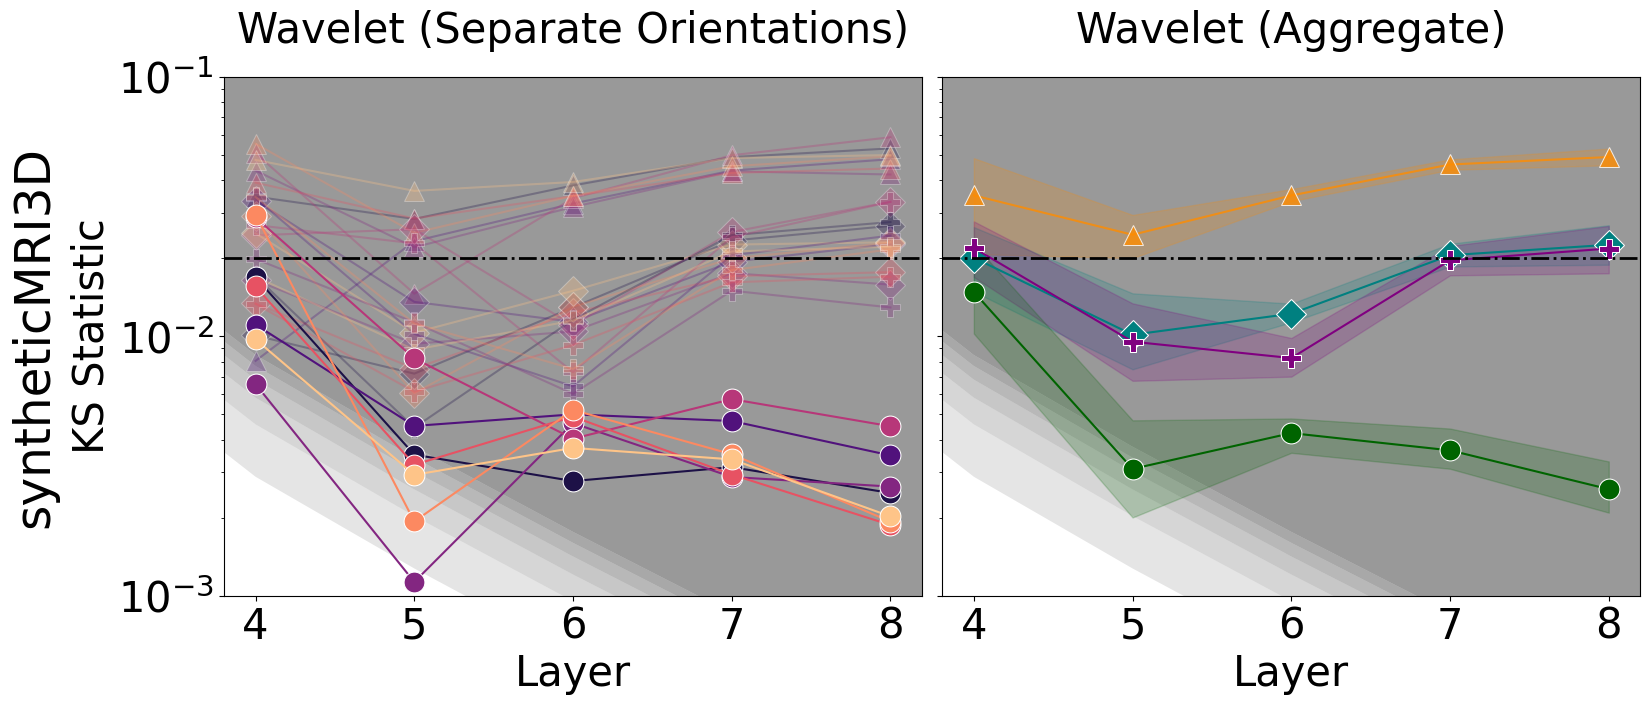

In [ ]:
# Define distinct colors for the separated plot
separated_palette = dict(zip(temp['orientation'].unique(), seaborn.color_palette("magma", len(temp['orientation'].unique()))))

temp = temp[temp['group'] > 3]
marker_size = 15
# y_limits = (1e-4, 1e-1)
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot the separated orientations
ax1 = axes[0]
if log_scale:
    ax1.set_yscale('log')

ax1.set_ylim(y_limits)
ax1.set_xlim((3.8, 8.2))

for k, alpha in enumerate(statistical_cutoffs[:-1]):
    ax1.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
ax1.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)

sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=separated_palette, marker='^', ax=ax1, markersize=marker_size, alpha=0.3)
sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=separated_palette, marker='D', ax=ax1, markersize=marker_size, alpha=0.3)
sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=separated_palette, marker='P', ax=ax1, markersize=marker_size, alpha=0.3)
sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=separated_palette, marker='o', ax=ax1, markersize=marker_size)

ax1.axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)
ax1.set_title("Wavelet (Separate Orientations)", fontsize=fontsize, y=1.05)
ax1.set_xlabel("Layer", fontsize=fontsize)
ax1.set_ylabel("KS Statistic", fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax1.legend(fontsize=12).set_visible(False)

# Plot the aggregated orientations
ax2 = axes[1]
if log_scale:
    ax2.set_yscale('log')

ax2.set_ylim(y_limits)
ax2.set_xlim((3.8, 8.2))

for k, alpha in enumerate(statistical_cutoffs[:-1]):
    ax2.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k]}'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[k+1]}'], color='black', alpha=alphas[k], ec=None)
ax2.fill_between(cutoff['group'], cutoff[f'kstest_stat_cutoff_{statistical_cutoffs[-1]}'], y_limits[1], color='black', alpha=alphas[-1], ec=None)

sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', marker='^', color='darkorange', alpha=0.8, ax=ax2, markersize=marker_size)
sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', marker='D', color='teal', ax=ax2, markersize=marker_size)
sns.lineplot(data=temp, x='group', y='kstest_stat_t', marker='P', color='purple', ax=ax2, markersize=marker_size)
sns.lineplot(data=temp, x='group', y='kstest_stat_best', marker='o', color='darkgreen', ax=ax2, markersize=marker_size)

ax2.axhline(y=practical_pass, linestyle="-.", color='black', linewidth=2)
ax2.set_title("Wavelet (Aggregate)", fontsize=fontsize, y=1.05)
ax2.set_xlabel("Layer", fontsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.legend(fontsize=12).set_visible(False)

# Add a legend below the plots for the aggregated plot
legend_elements = [
    Line2D([0], [0], color='darkorange', marker='^', label='Gaussian', markersize=10, linestyle=''),
    Line2D([0], [0], color='teal', marker='D', label='Laplace', markersize=10, linestyle=''),
    Line2D([0], [0], color='purple', marker='P', label='Student-t', markersize=10, linestyle=''),
    Line2D([0], [0], color='darkgreen', marker='o', label='GenGamma Hyperprior', markersize=10, linestyle='')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=fontsize, bbox_to_anchor=(0.5, -0.02)).set_visible(False)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for the legend

ax1.annotate("syntheticMRI3D", xy=(0, 0.5), xytext=(-ax1.yaxis.labelpad - 5, 0),
             xycoords=ax1.yaxis.label, textcoords='offset points',
             ha='right', va='center', fontsize=fontsize+5, rotation=90)

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "ksstats_syntheticMRI3D.jpg")
    plt.savefig(save_path, dpi=DPI, bbox_inches='tight')

plt.show()



# Learned Filters

In [21]:
nonskewed_df = pd.read_csv(os.path.join(ROOT_DIR, 'learned-filters', 'nonskewed_filter_idxs_df.csv')).set_index(['dataset', 'num_images', 'num_bootstrap'])
nonskewed_df = nonskewed_df.sort_values('num_images', ascending=False).groupby('dataset').first()
nonskewed_df['num_filters'] = nonskewed_df['nonskewed_filter_idxs'].apply(lambda x : len(eval(x)))
nonskewed_df

,nonskewed_filter_idxs,num_filters
dataset,,
agriVision-full,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",60
coco-indoor,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",62
coco-outdoor,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",64
pastis-full,"[2, 3, 4, 5, 6, 9, 11, 12, 13, 16, 17, 18, 20,...",32
segmentAnything-full,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",64
spaceNet-full,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",56
standardTesting-full,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",54


In [22]:
common_filter_idxs = set.intersection(*[set(eval(i)) for i in nonskewed_df['nonskewed_filter_idxs']])
print(len(common_filter_idxs))

32


In [23]:
filters = pd.read_pickle(os.path.join(ROOT_DIR, 'learned-filters', 'filters.pickle'))
filter_groups = ['dual_color', 'eye', 'inside_out', 'misc', 'multi_edge','single_edge']
renamed_filter_groups = ['3dual_color', '4eye', '5inside_out', '6misc', '2multi_edge','1single_edge']
rename_dict = dict(zip(filter_groups, renamed_filter_groups))
rename_dict

{'dual_color': '3dual_color',
 'eye': '4eye',
 'inside_out': '5inside_out',
 'misc': '6misc',
 'multi_edge': '2multi_edge',
 'single_edge': '1single_edge'}

In [24]:
transform='learned'
marker_size = 100
fontsize=25

fixed_palette = {'single_edge': 'red',
                'multi_edge': 'blue',
                'eye': 'xkcd:dark yellow',
                'dual_color': 'darkgreen',
                'inside_out': 'purple',
                'misc': 'orange'}

priors = ['kstest_stat_gaussian', 'kstest_stat_laplace', 'kstest_stat_t', 'kstest_stat_best']
prior_markers = {'kstest_stat_gaussian': '^', 'kstest_stat_laplace': 'D', 
                'kstest_stat_t': 'P', 'kstest_stat_best': 'o'}

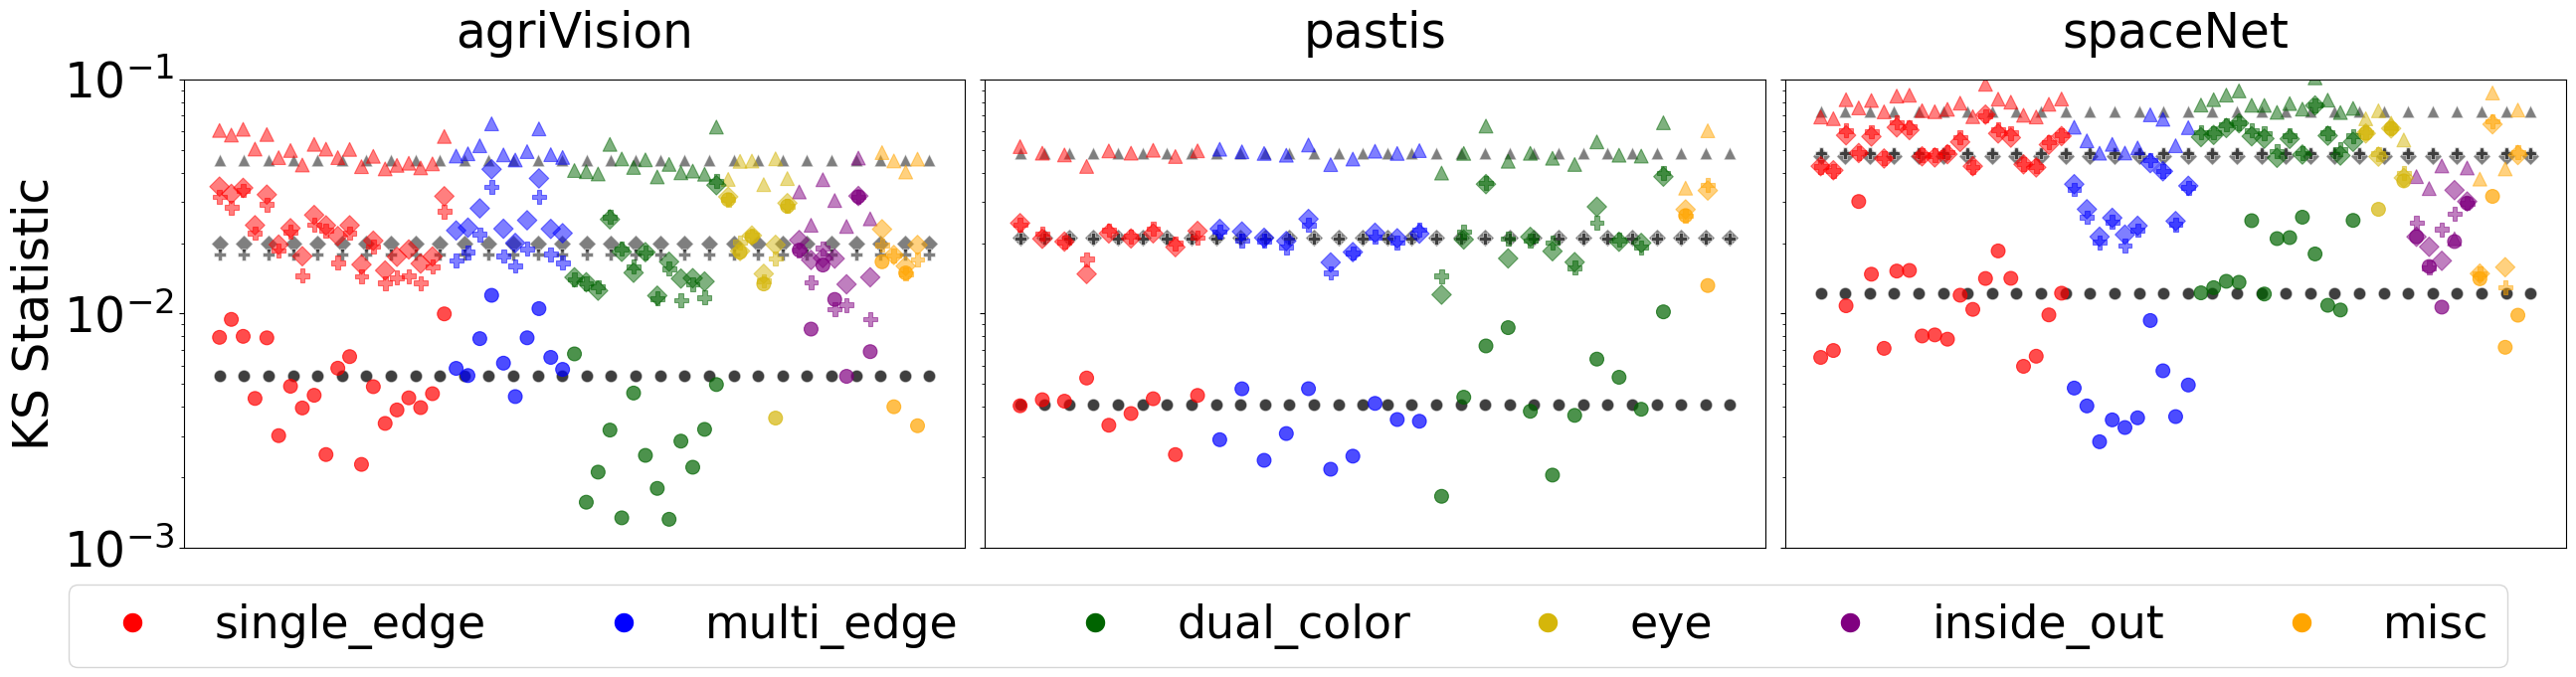

In [25]:
datasets_to_include = ['agriVision', 'pastis', 'spaceNet']
num_datasets = len(datasets_to_include)


fig, axes = plt.subplots(1, 3, figsize=(26, 6), sharey=True)  # Adjusted to 1 row and 3 columns
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, dataset_name in enumerate(datasets_to_include):
    dataset_filter = (main_df['dataset'] == dataset_name)
    transform_filter = (main_df['transform'] == transform)
    temp = main_df[dataset_filter & transform_filter].copy()
    temp['filter_var'] = [np.var(filters[idx]) for idx in temp['group']]
    temp['orientation'] = temp['orientation'].replace(dict(zip(filter_groups, renamed_filter_groups)))
    temp = temp.sort_values('orientation')
    temp['orientation'] = temp['orientation'].replace(dict(zip(renamed_filter_groups, filter_groups)))
    temp['group'] = np.arange(0, len(temp))
    
    x_limits = (0, len(temp))

    for prior in priors:
        median_value = temp[prior].median()
        linestyle = {'kstest_stat_gaussian': '-', 'kstest_stat_laplace': '--', 
                     'kstest_stat_t': '-.', 'kstest_stat_best': ':'}[prior]
        sns.scatterplot(x=np.linspace(*x_limits, 30), y=median_value, marker=prior_markers[prior], ax=axes[i], s=marker_size-20, color='black', zorder=0, alpha=0.5)
    sns.scatterplot(x=np.linspace(*x_limits, 30), y=median_value, marker=prior_markers['kstest_stat_best'], ax=axes[i], s=marker_size-20, color='black', zorder=0, alpha=0.5)

    sns.scatterplot(data=temp, x='group', y='kstest_stat_gaussian', hue='orientation', palette=fixed_palette, marker='^', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.5)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_laplace', hue='orientation', palette=fixed_palette, marker='D', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.5)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_t', hue='orientation', palette=fixed_palette, marker='P', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.5)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_best', hue='orientation', palette=fixed_palette, marker='o', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.7)
    
    axes[i].set_title(dataset_name, fontsize=fontsize+10, y= 1.05)
    axes[i].set_xlabel("")
    axes[i].set_yscale("log")
    axes[i].set_ylim((1e-3, 1e-1))
    axes[i].tick_params(axis='both', which='major', labelsize=fontsize+10)
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axes[i].legend().set_visible(False)

axes[0].set_xlabel("", fontsize=80)
axes[0].set_ylabel("KS Statistic", fontsize=fontsize+10)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='single_edge', markersize=5, markerfacecolor=fixed_palette['single_edge']),
                   Line2D([0], [0], marker='o', color='w', label='multi_edge', markersize=5, markerfacecolor=fixed_palette['multi_edge']),
                   Line2D([0], [0], marker='o', color='w', label='dual_color', markersize=5, markerfacecolor=fixed_palette['dual_color']),
                   Line2D([0], [0], marker='o', color='w', label='eye', markersize=5, markerfacecolor=fixed_palette['eye']),
                   Line2D([0], [0], marker='o', color='w', label='inside_out', markersize=5, markerfacecolor=fixed_palette['inside_out']),
                   Line2D([0], [0], marker='o', color='w', label='misc', markersize=5, markerfacecolor=fixed_palette['misc']),
                   ]          
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=6, fontsize=fontsize+8, markerscale=3)#.set_visible(False)

plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "ksstats_remote_sensing_learned.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')


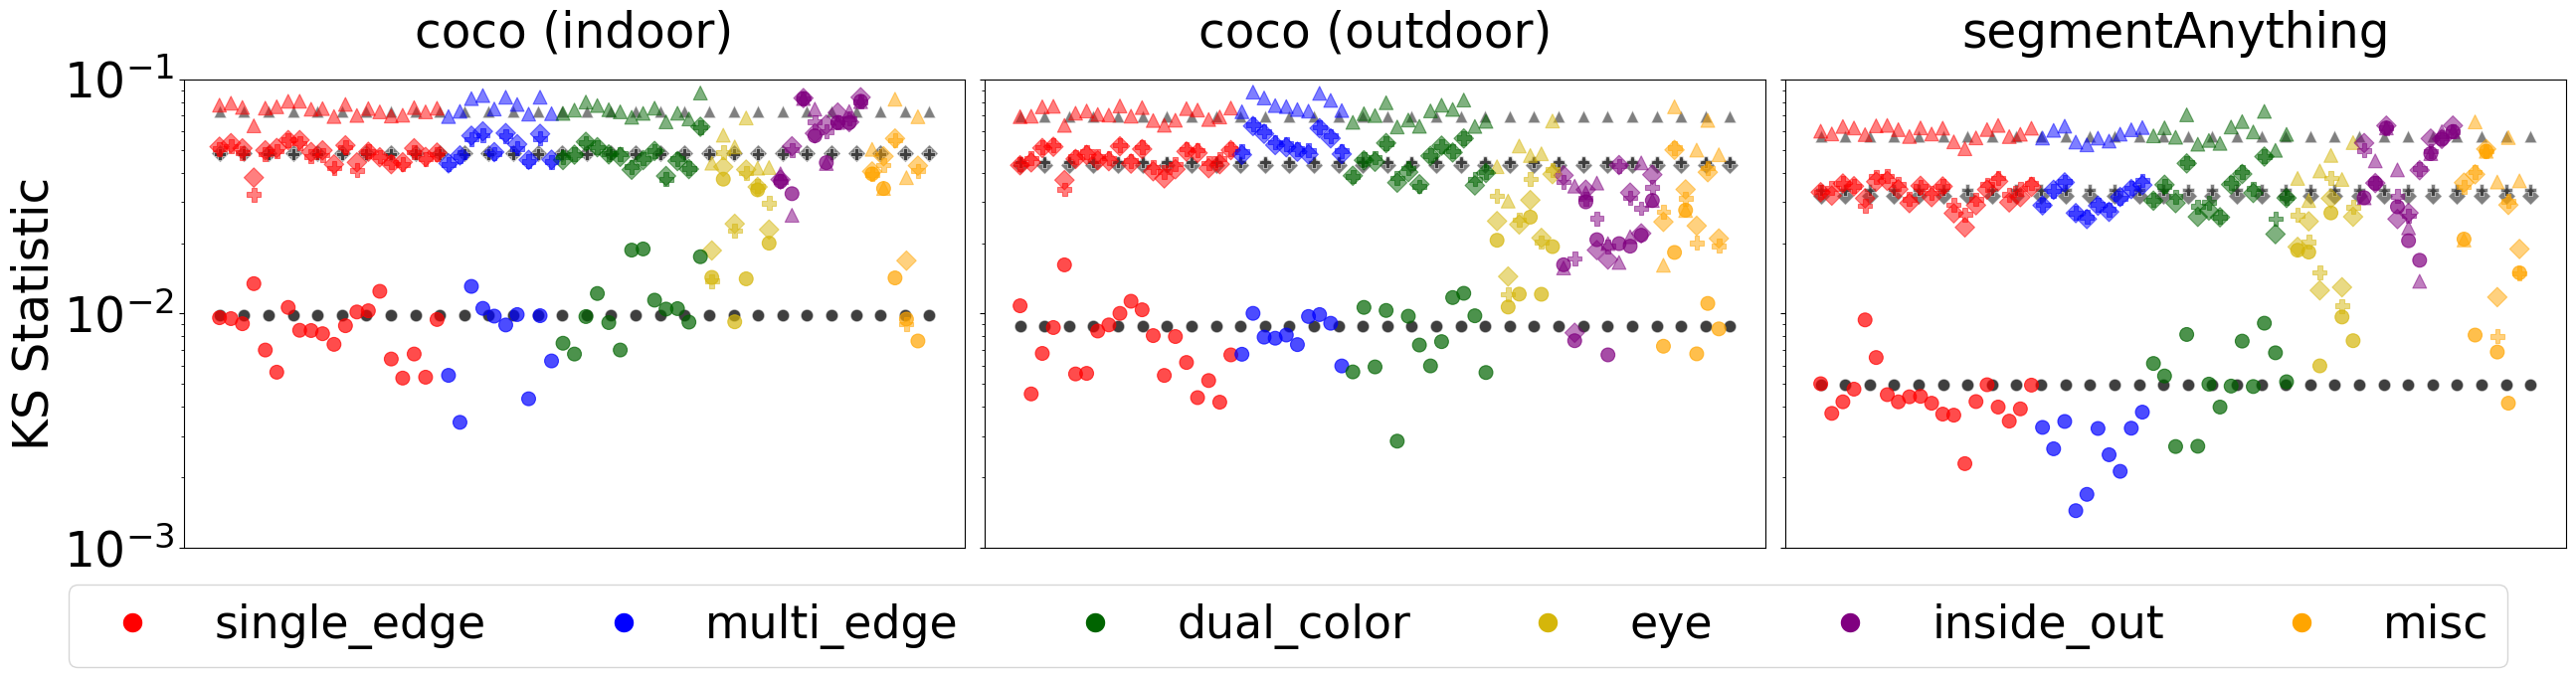

In [26]:
datasets_to_include = ['coco (indoor)', 'coco (outdoor)', 'segmentAnything']
num_datasets = len(datasets_to_include)

fig, axes = plt.subplots(1, 3, figsize=(26, 6), sharey=True) 
axes = axes.flatten()  

for i, dataset_name in enumerate(datasets_to_include):
    dataset_filter = (main_df['dataset'] == dataset_name)
    transform_filter = (main_df['transform'] == transform)
    temp = main_df[dataset_filter & transform_filter].copy()
    temp['filter_var'] = [np.var(filters[idx]) for idx in temp['group']]
    temp['orientation'] = temp['orientation'].replace(dict(zip(filter_groups, renamed_filter_groups)))
    temp = temp.sort_values('orientation')
    temp['orientation'] = temp['orientation'].replace(dict(zip(renamed_filter_groups, filter_groups)))
    temp['group'] = np.arange(0, len(temp))
    
    x_limits = (0, len(temp))

    for prior in priors:
        median_value = temp[prior].median()
        linestyle = {'kstest_stat_gaussian': '-', 'kstest_stat_laplace': '--', 
                     'kstest_stat_t': '-.', 'kstest_stat_best': ':'}[prior]
        sns.scatterplot(x=np.linspace(*x_limits, 30), y=median_value, marker=prior_markers[prior], ax=axes[i], s=marker_size-20, color='black', zorder=0, alpha=0.5)
    sns.scatterplot(x=np.linspace(*x_limits, 30), y=median_value, marker=prior_markers['kstest_stat_best'], ax=axes[i], s=marker_size-20, color='black', zorder=0, alpha=0.5)

    sns.scatterplot(data=temp, x='group', y='kstest_stat_gaussian', hue='orientation', palette=fixed_palette, marker='^', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.5)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_laplace', hue='orientation', palette=fixed_palette, marker='D', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.5)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_t', hue='orientation', palette=fixed_palette, marker='P', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.5)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_best', hue='orientation', palette=fixed_palette, marker='o', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.7)
    
    axes[i].set_title(dataset_name, fontsize=fontsize+10,  y= 1.05)
    axes[i].set_xlabel("")
    axes[i].set_yscale("log")
    axes[i].set_ylim((1e-3, 1e-1))
    axes[i].tick_params(axis='both', which='major', labelsize=fontsize+10)
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axes[i].legend().set_visible(False)

axes[0].set_xlabel("", fontsize=80)
axes[0].set_ylabel("KS Statistic", fontsize=fontsize+10)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='single_edge', markersize=5, markerfacecolor=fixed_palette['single_edge']),
                   Line2D([0], [0], marker='o', color='w', label='multi_edge', markersize=5, markerfacecolor=fixed_palette['multi_edge']),
                   Line2D([0], [0], marker='o', color='w', label='dual_color', markersize=5, markerfacecolor=fixed_palette['dual_color']),
                   Line2D([0], [0], marker='o', color='w', label='eye', markersize=5, markerfacecolor=fixed_palette['eye']),
                   Line2D([0], [0], marker='o', color='w', label='inside_out', markersize=5, markerfacecolor=fixed_palette['inside_out']),
                   Line2D([0], [0], marker='o', color='w', label='misc', markersize=5, markerfacecolor=fixed_palette['misc']),
                   ]          
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=6, fontsize=fontsize+8, markerscale=3)#.set_visible(False)

plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, "ksstats_natural_learned.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')


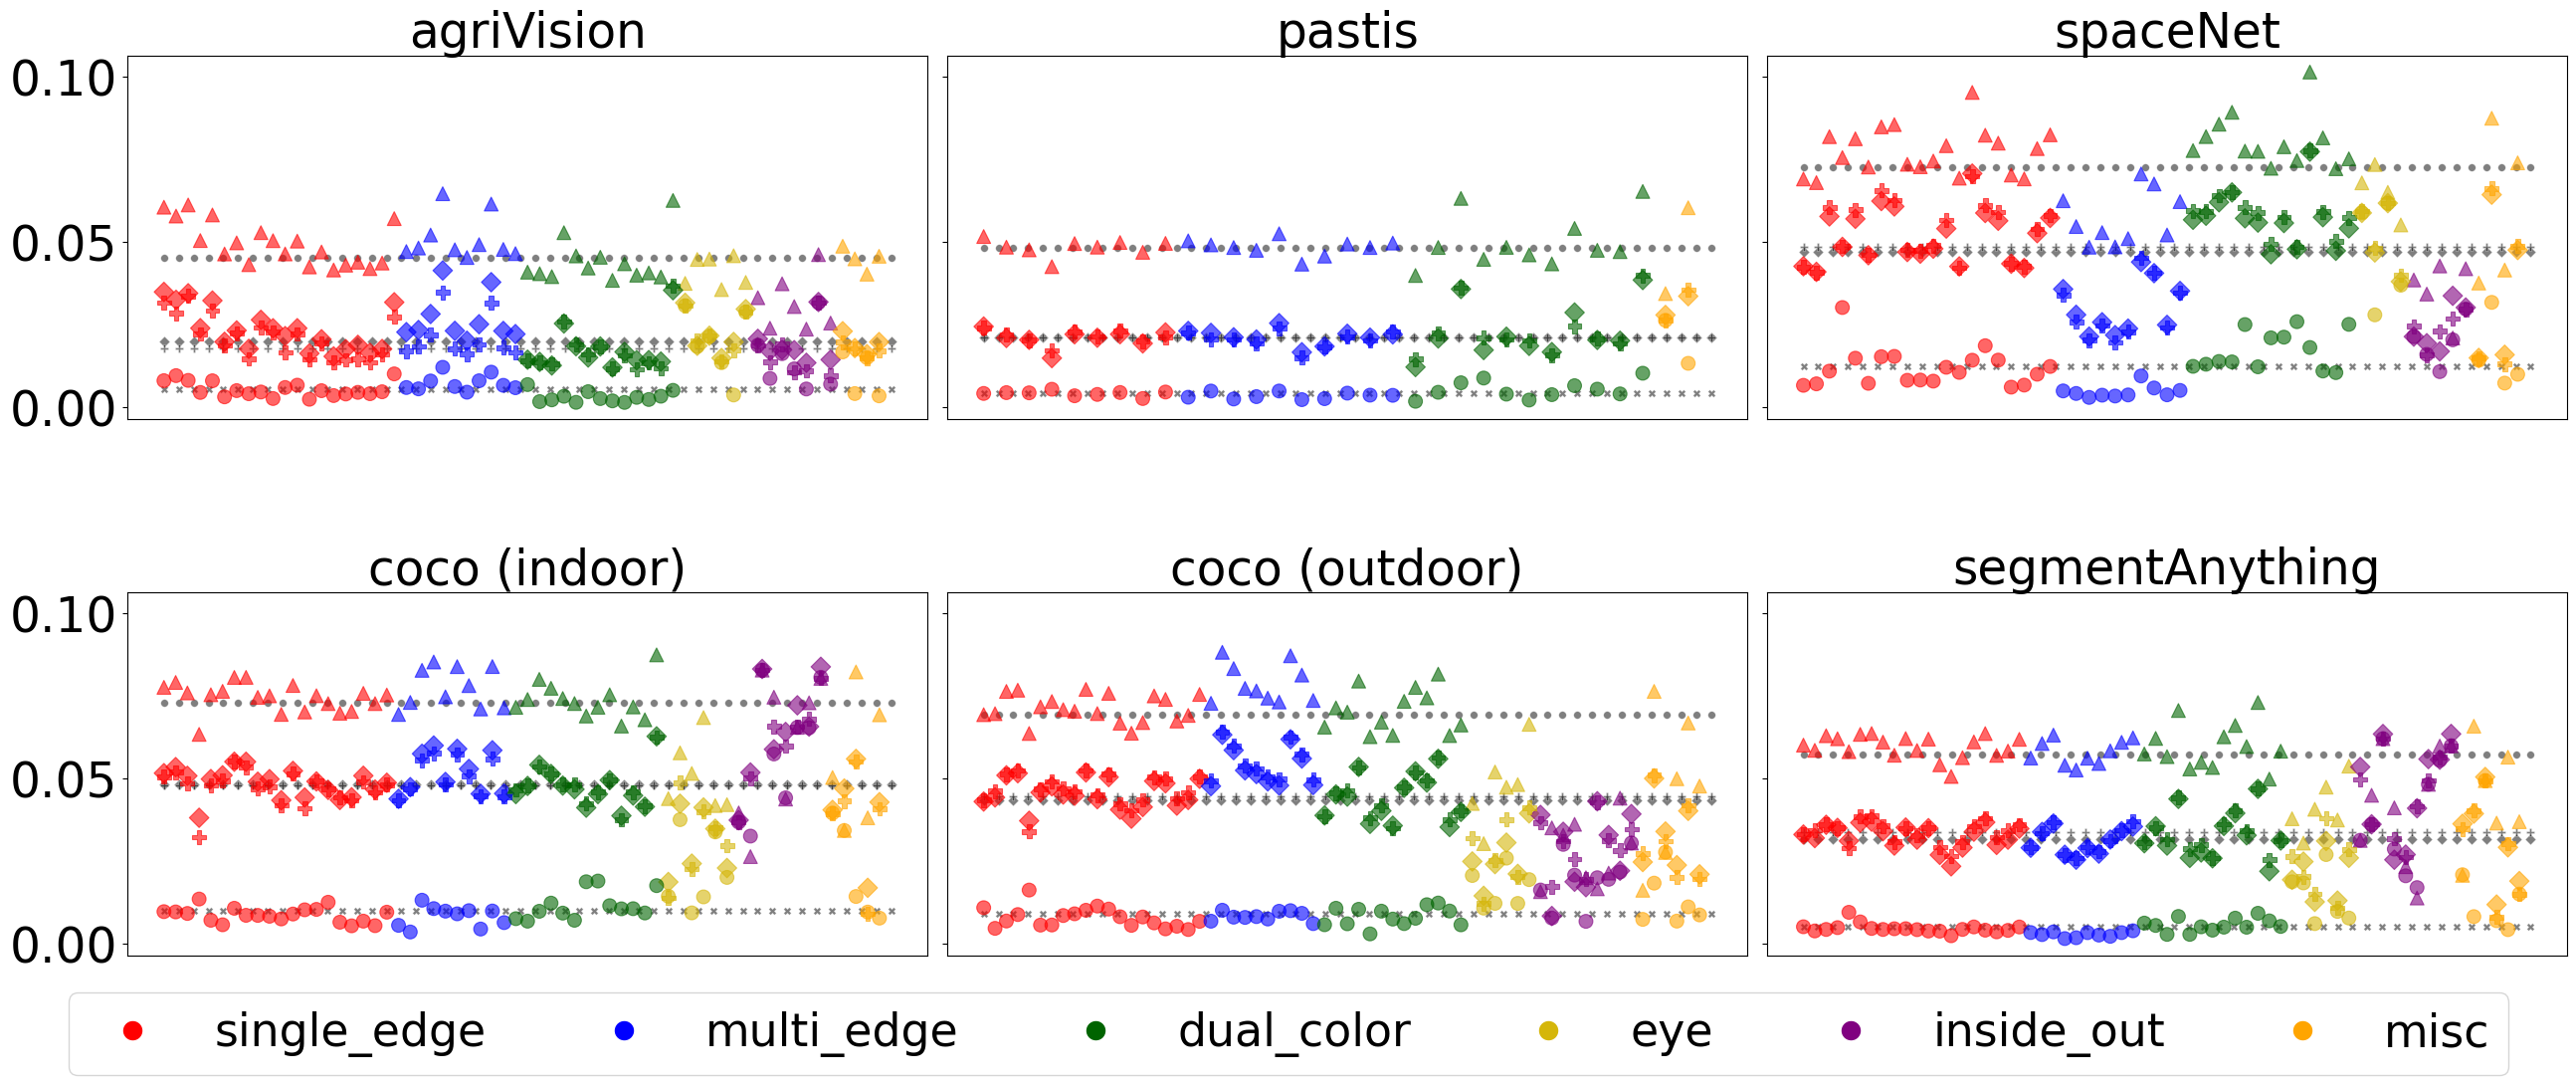

In [27]:
datasets_to_include = ['agriVision', 'pastis', 'spaceNet', 'coco (indoor)', 'coco (outdoor)', 'segmentAnything']
num_datasets = len(datasets_to_include)
transform='learned'
marker_size = 100
fontsize=25

fixed_palette = {'single_edge': 'red',
                'multi_edge': 'blue',
                'eye': 'xkcd:dark yellow',
                'dual_color': 'darkgreen',
                'inside_out': 'purple',
                'misc': 'orange'}

fig, axes = plt.subplots(2, 3, figsize=(26, 10), sharey=True)  # Adjusted to 2 rows and 3 columns
# fig.patch.set_facecolor('#F9FCD6')  # Set the background color of the entire figure
axes = axes.flatten()  # Flatten the axes array for easier indexing
plt.subplots_adjust(hspace=0.3)  # Increase the vertical space between rows to fit a subtitle

for i, dataset_name in enumerate(datasets_to_include):
    dataset_filter = (main_df['dataset'] == dataset_name)
    transform_filter = (main_df['transform'] == transform)
    temp = main_df[dataset_filter & transform_filter].copy()
    temp['filter_var'] = [np.var(filters[idx]) for idx in temp['group']]
    temp['orientation'] = temp['orientation'].replace(dict(zip(filter_groups, renamed_filter_groups)))
    temp = temp.sort_values('orientation')
    temp['orientation'] = temp['orientation'].replace(dict(zip(renamed_filter_groups, filter_groups)))
    temp['group'] = np.arange(0, len(temp))
    priors = ['kstest_stat_gaussian', 'kstest_stat_laplace', 'kstest_stat_t', 'kstest_stat_best']
    prior_markers = {'kstest_stat_gaussian': 'o', 'kstest_stat_laplace': 'D', 
                     'kstest_stat_t': 'P', 'kstest_stat_best': 'X'}
    
    x_limits = (0, len(temp))

    for prior in priors:
        median_value = temp[prior].median()
        linestyle = {'kstest_stat_gaussian': '-', 'kstest_stat_laplace': '--', 
                     'kstest_stat_t': '-.', 'kstest_stat_best': ':'}[prior]
        sns.scatterplot(x=np.linspace(*x_limits, 50), y=median_value, marker=prior_markers[prior], ax=axes[i], s=30, color='black', zorder=0, alpha=0.5)

    sns.scatterplot(data=temp, x='group', y='kstest_stat_gaussian', hue='orientation', palette=fixed_palette, marker='^', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.6)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_laplace', hue='orientation', palette=fixed_palette, marker='D', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.6)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_t', hue='orientation', palette=fixed_palette, marker='P', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.6)
    sns.scatterplot(data=temp, x='group', y='kstest_stat_best', hue='orientation', palette=fixed_palette, marker='o', ax=axes[i], s=marker_size, zorder=1, ec=None, alpha=0.6)
    
    axes[i].set_title(dataset_name, fontsize=fontsize+10)
    axes[i].set_xlabel(" ")
    axes[i].tick_params(axis='both', which='major', labelsize=fontsize+10)
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axes[i].legend().set_visible(False)

axes[0].set_xlabel(" ", fontsize=80)
axes[0].set_ylabel("", fontsize=fontsize)
axes[3].set_ylabel("", fontsize=fontsize)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='single_edge', markersize=5, markerfacecolor=fixed_palette['single_edge']),
                   Line2D([0], [0], marker='o', color='w', label='multi_edge', markersize=5, markerfacecolor=fixed_palette['multi_edge']),
                   Line2D([0], [0], marker='o', color='w', label='dual_color', markersize=5, markerfacecolor=fixed_palette['dual_color']),
                   Line2D([0], [0], marker='o', color='w', label='eye', markersize=5, markerfacecolor=fixed_palette['eye']),
                   Line2D([0], [0], marker='o', color='w', label='inside_out', markersize=5, markerfacecolor=fixed_palette['inside_out']),
                   Line2D([0], [0], marker='o', color='w', label='misc', markersize=5, markerfacecolor=fixed_palette['misc']),
                   ]          
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=6, fontsize=fontsize+8, markerscale=3)#.set_visible(False)

plt.tight_layout()
plt.show()

# if SAVE_FIGS:
#     save_path = os.path.join(plots_path, "ksstats_learned_filters.jpg")
#     fig.savefig(save_path, dpi=DPI, bbox_inches='tight')
